**Created on Jul 2019**

<strong> Author </strong>: Alexandre Yao

<h1>Use simple linear regression to predict workers' salary</h1>

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**There are 2 columns in the data** :
> *YearsExperience*: provides the data on the year of experience of the observation (the row)
>    
> *Salary*: provides the data on the observation salary

# Data analysis and visualization

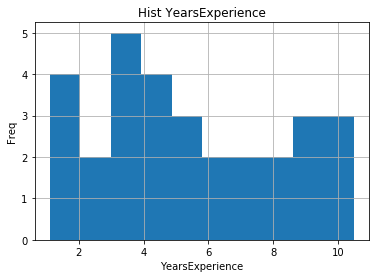

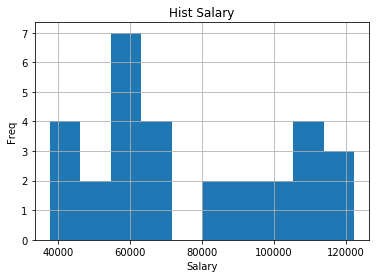

In [6]:
for c in dataset.columns : 
    df = dataset[c]
    plt.figure()
    plt.hist(df)
    plt.title('Hist ' + c)
    plt.xlabel(c)
    plt.ylabel('Freq')
    plt.grid(True)
    plt.show()

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

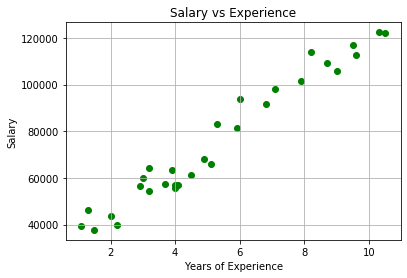

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
plt.scatter(X, y, color = 'green')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.grid(True)
plt.ylabel('Salary')
plt.show()
dataset.corr()

<p> Visually, there is a strong correlation between years of experience and salary. More and more the years of experience is rising more and more the salary increases. So there is a positive correlation. The correlation coefficient between the two columns is 0.97 which confirms our visual intuitions.<p>

In the following we will therefore predict the salary of the observations using their years of experience.

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

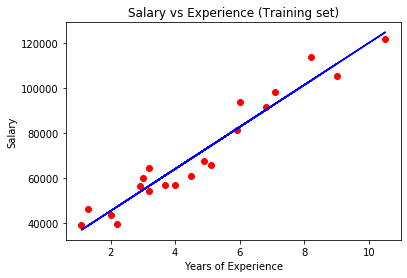

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

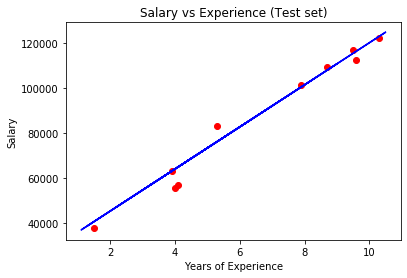

In [13]:
y_test_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
y_test_pred = pd.Series(y_test_pred)
y_test = pd.Series(y_test)

In [15]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error, max_error, r2_score)
from colour import Color

def min_error(y_true, y_pred):
    return np.min(np.abs(y_true - y_pred))

def percentage_error(y_true, y_pred, q):
    y_temp = np.abs(y_true - y_pred)
    return round(np.quantile(y_temp, q / 100), 3)

def my_score_neg(y_true, y_pred):
    d = y_true - y_pred
    pred_neg = d[(d < 0)]
    s = (pred_neg).mean()
    return s

def my_score_pos(y_true, y_pred):
    d = y_true - y_pred
    pred_pos = d[(d >= 0)]
    s = pred_pos.mean()
    return s

def get_regression_metrics(y_true, y_pred):
    regr_metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': mean_squared_error(y_true, y_pred)**0.5,
        'min_error': min_error(y_true, y_pred),
        'max_error': max_error(y_true, y_pred),
        'R^2': r2_score(y_true, y_pred),
        '25% error': percentage_error(y_true, y_pred, 25),
        '50% error': percentage_error(y_true, y_pred, 50),
        '95% error': percentage_error(y_true, y_pred, 95),
        'MEN': my_score_neg(y_true, y_pred),
        'MEP': my_score_pos(y_true, y_pred)
    }
    # return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = ['Value']
    return df_regr_metrics

def plot_true_pred(y_true, y_pred):
    y_pred = y_pred.sort_values()
    y_true = y_true[y_pred.index.tolist()]
    plt.figure()
    plt.scatter(y_true, np.arange(y_true.shape[0]), marker='+', color='g')
    plt.scatter(y_pred, np.arange(y_pred.shape[0]), marker='x', color='r')
    plt.grid()
    plt.xlabel('values.')
    plt.ylabel('Obs.')
    plt.title('y_true VS y_pred')
    plt.legend(['y_true', 'y_pred'])
    plt.show()

def plot_residual(y_true, y_pred):
    plt.scatter(
        y_pred, y_true - y_pred, c='lightgreen', marker='.', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    #plt.legend(loc='upper left')
    plt.hlines(
        y=0, xmin=y_pred.min() - 5, xmax=y_pred.max() + 10, color='red', lw=2)
    plt.title('Test data  -- Model Residuals')
    plt.grid(True)
    plt.show()

In [16]:
get_regression_metrics(y_test, y_test_pred)

,Value
MAE,3426.426937
RMSE,4585.415720
min_error,47.367772
max_error,8405.962017
R^2,0.974915
25% error,842.577000
50% error,2235.230000
95% error,8247.379000
MEN,-4033.605177
MEP,2515.659577


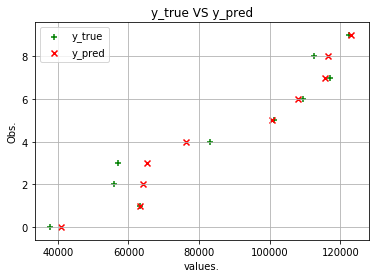

In [17]:
plot_true_pred(y_test, y_test_pred)

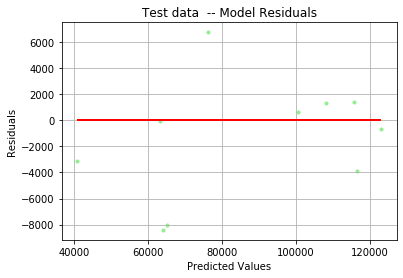

In [18]:
plot_residual(y_test, y_test_pred)